# Analiza danych

---

## Import pakietów i modułów

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import functions as fun
import matplotlib.pyplot as plt

---

## Tworzenie bazy danych

In [4]:
conn = sqlite3.connect("pd3_data_base.db")

In [5]:
fitness = fun.read_csv_files_and_add_to_data_base("fitness_stackexchange_com", "F", conn)
interpersonal = fun.read_csv_files_and_add_to_data_base("interpersonal_stackexchange_com", "I", conn)
worldbuilding = fun.read_csv_files_and_add_to_data_base("worldbuilding_stackexchange_com", "W", conn)

In [4]:
fitness["TagsF"].head()

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,cutting,22,NaN,NaN
1,2,diet,518,3384.0,3383.0
2,3,protein,201,7669.0,7668.0
3,4,nutrition,320,527.0,526.0
4,5,jogging,78,NaN,NaN


---

## Przykładowe wywołania

In [5]:
worldbuilding["CommentsW"].head()

,Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName
0,5,3,10,I feel like this question should also require ...,2014-09-16T18:37:00.430,17.0,NaN
1,7,13,0,"I believe, but don't have references handy to ...",2014-09-16T19:04:31.863,29.0,NaN
2,8,13,0,"Also, are you concerned with news reporting **...",2014-09-16T19:06:05.700,29.0,NaN
3,9,12,0,"True, Harry Potter combines the elements, but ...",2014-09-16T19:13:59.650,28.0,NaN
4,10,19,0,I think this would be better on Linguistics.st...,2014-09-16T19:15:27.260,15.0,NaN


---

## Zapytania i wykresy

## Jak sie ma liczba komentarzy do odsłon

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt_
import seaborn as sns

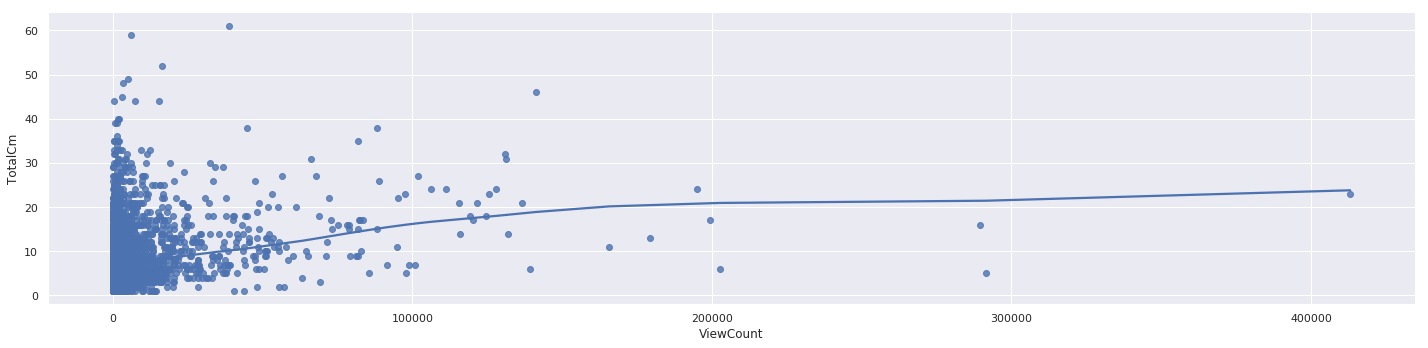

In [12]:
# Fitness 

xF = fitness["PostsF"].\
loc[fitness["PostsF"].PostTypeId==1, \
    ["Id","ParentId", "CommentCount"]]
yF = fitness["PostsF"].\
loc[fitness["PostsF"].PostTypeId==2, \
    ["Id","ParentId", "CommentCount"]]

zF = pd.merge(xF,yF,left_on="Id",right_on = "ParentId")

u1F = zF.groupby("Id_x")["CommentCount_y"].sum().reset_index(drop=False)
u2F=zF.groupby("Id_x").size().reset_index(drop=False)
uF = pd.merge(u1F,u2F, on="Id_x").rename(index=str, columns={"Id_x":"Id_x", "CommentCount_y":"Tot",0:"n"})
wF = pd.merge(uF,zF, on="Id_x").rename(index=str, columns={"Id_x":"Id",0:"n"})
wF["TotalCm"]=wF["Tot"]+wF["n"]+wF["CommentCount_x"]
QuestionsComViewF = pd.merge(wF, fitness["PostsF"],on="Id").loc[:,["Id","TotalCm","ViewCount" ]].\
drop_duplicates().reset_index(drop=True)

QuestionsComViewF.to_csv("dane_posrednie/q3/QuestionsComViewF.csv", sep='\t')

# teraz wykres 
plt = sns.lmplot(x="ViewCount", y="TotalCm", data=QuestionsComViewF,height=5,aspect=4,
           lowess=True);
plt
plt.savefig("wykresy/q3/fitness.png")

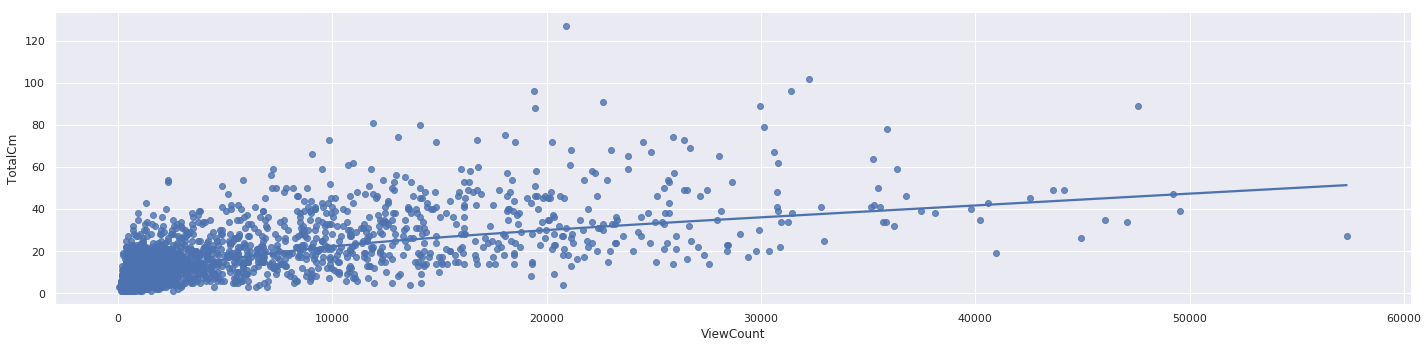

In [13]:
# Interpersonal
xI = interpersonal["PostsI"].\
loc[interpersonal["PostsI"].PostTypeId==1, \
    ["Id","ParentId", "CommentCount"]]
yI = interpersonal["PostsI"].\
loc[interpersonal["PostsI"].PostTypeId==2, \
    ["Id","ParentId", "CommentCount"]]

zI = pd.merge(xI,yI,left_on="Id",right_on = "ParentId")

u1I = zI.groupby("Id_x")["CommentCount_y"].sum().reset_index(drop=False)
u2I=zI.groupby("Id_x").size().reset_index(drop=False)
uI = pd.merge(u1I,u2I, on="Id_x").rename(index=str, columns={"Id_x":"Id_x", "CommentCount_y":"Tot",0:"n"})
wI = pd.merge(uI,zI, on="Id_x").rename(index=str, columns={"Id_x":"Id",0:"n"})
wI["TotalCm"]=wI["Tot"]+wI["n"]+wI["CommentCount_x"]
QuestionsComViewI = pd.merge(wI, interpersonal["PostsI"],on="Id").loc[:,["Id","TotalCm","ViewCount" ]].\
drop_duplicates().reset_index(drop=True)

QuestionsComViewI.to_csv("dane_posrednie/q3/QuestionsComViewI.csv", sep='\t')

# Wykres
plt = sns.lmplot(x="ViewCount", y="TotalCm", data=QuestionsComViewI,height=5,aspect=4,
           lowess=True);

plt
plt.savefig("wykresy/q3/interpersonal.png")

---

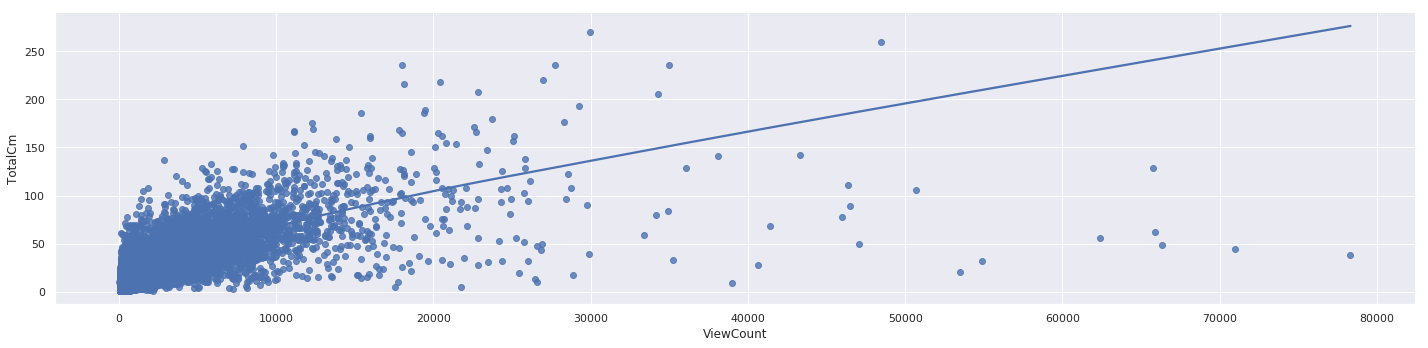

In [17]:
# worldbuilding 
xW = worldbuilding["PostsW"].\
loc[worldbuilding["PostsW"].PostTypeId==1, \
    ["Id","ParentId", "CommentCount"]]
yW = worldbuilding["PostsW"].\
loc[worldbuilding["PostsW"].PostTypeId==2, \
    ["Id","ParentId", "CommentCount"]]

zW = pd.merge(xW,yW,left_on="Id",right_on = "ParentId")

u1W = zW.groupby("Id_x")["CommentCount_y"].sum().reset_index(drop=False)
u2W=zW.groupby("Id_x").size().reset_index(drop=False)
uW = pd.merge(u1W,u2W, on="Id_x").rename(index=str, columns={"Id_x":"Id_x", "CommentCount_y":"Tot",0:"n"})
wW = pd.merge(uW,zW, on="Id_x").rename(index=str, columns={"Id_x":"Id",0:"n"})
wW["TotalCm"]=wW["Tot"]+wW["n"]+wW["CommentCount_x"]
QuestionsComViewW = pd.merge(wW, worldbuilding["PostsW"],on="Id").loc[:,["Id","TotalCm","ViewCount" ]].\
drop_duplicates().reset_index(drop=True)

QuestionsComViewW.to_csv("dane_posrednie/q3/QuestionsComViewW.csv", sep='\t')

#wykresy
plt = sns.lmplot(x="ViewCount", y="TotalCm", data=QuestionsComViewW,height=5,aspect=4,
           lowess=True);

plt
plt.savefig("wykresy/q3/worldbuilding.png")

## Posty, które miały największą liczbę wyświetleń

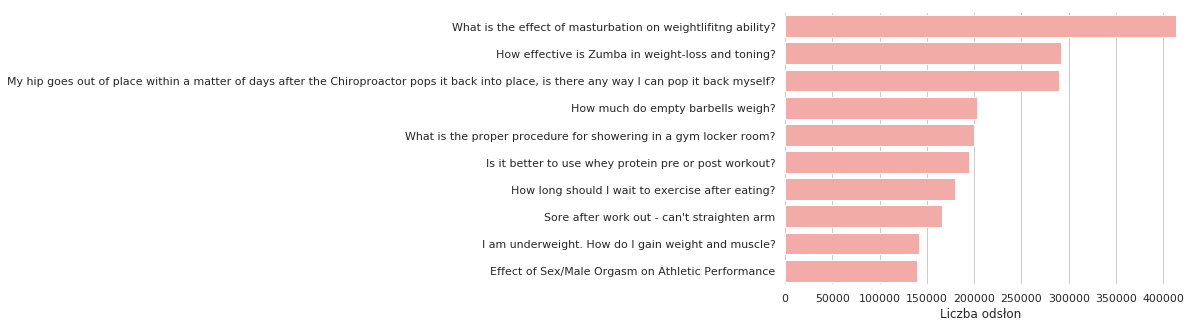

In [33]:
# FITNESS
TopViewsPostsF = fitness["PostsF"].loc[:,["Title", "ViewCount"]].sort_values("ViewCount", ascending=False).reset_index(drop=True)
TopViewsPostsF.head()
import seaborn as sns

TopViewsPostsF.to_csv("dane_posrednie/q2/TopViewsPostsF.csv", sep='\t')

#Wykresy
x=TopViewsPostsF.head(10)

sns.set(style="whitegrid")

f, ax = plt_.subplots(figsize=(7, 5))

sns.set_color_codes("pastel")
sns.barplot(y="Title", x="ViewCount", data=x,label="Total", color="r")


ax.set(xlim=(0, max(x.ViewCount)), ylabel="",xlabel="Liczba odsłon")
sns.despine(left=True, bottom=True)



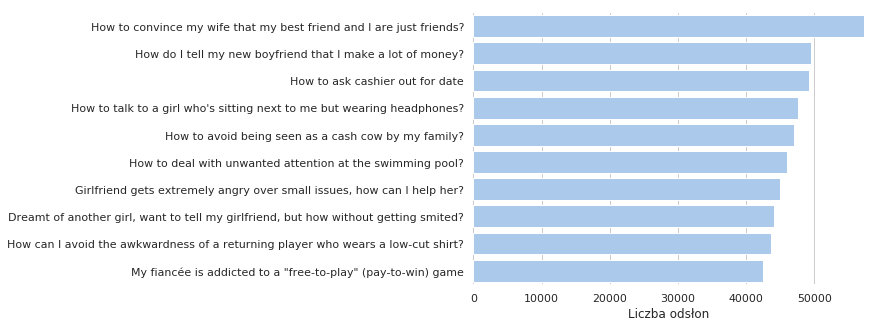

In [12]:
#INTERPERSONAL
TopViewsPostsI = interpersonal["PostsI"].loc[:,["Title", "ViewCount"]].sort_values("ViewCount", ascending=False)

x=TopViewsPostsI.head(10)

TopViewsPostsI.to_csv("dane_posrednie/q2/TopViewsPostsI.csv", sep='\t')

#Wykres

sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(7, 5))



sns.set_color_codes("pastel")
sns.barplot(y="Title", x="ViewCount", data=x,label="Total", color="b")

ax.set(xlim=(0, max(x.ViewCount)), ylabel="",xlabel="Liczba odsłon")
sns.despine(left=True, bottom=True)

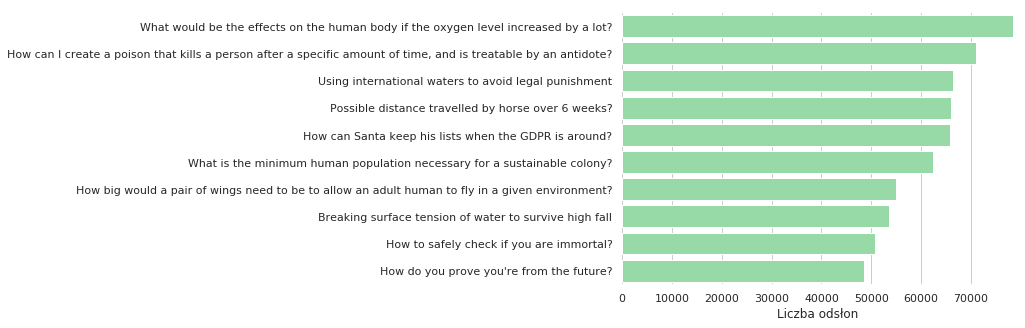

In [13]:
# Worldbuilding
TopViewsPostsW = worldbuilding["PostsW"].loc[:,["Title", "ViewCount"]].sort_values("ViewCount", ascending=False)

x=TopViewsPostsW.head(10)

TopViewsPostsW.to_csv("dane_posrednie/q2/TopViewsPostsW.csv", sep='\t')


# wykres
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))



sns.set_color_codes("pastel")
sns.barplot(y="Title", x="ViewCount", data=x,label="Total", color="g")

ax.set(xlim=(0, max(x.ViewCount)), ylabel="",xlabel="Liczba odsłon")
sns.despine(left=True, bottom=True)

## Jak zmieniała się liczba zakładanych kont w latach 2011-2018

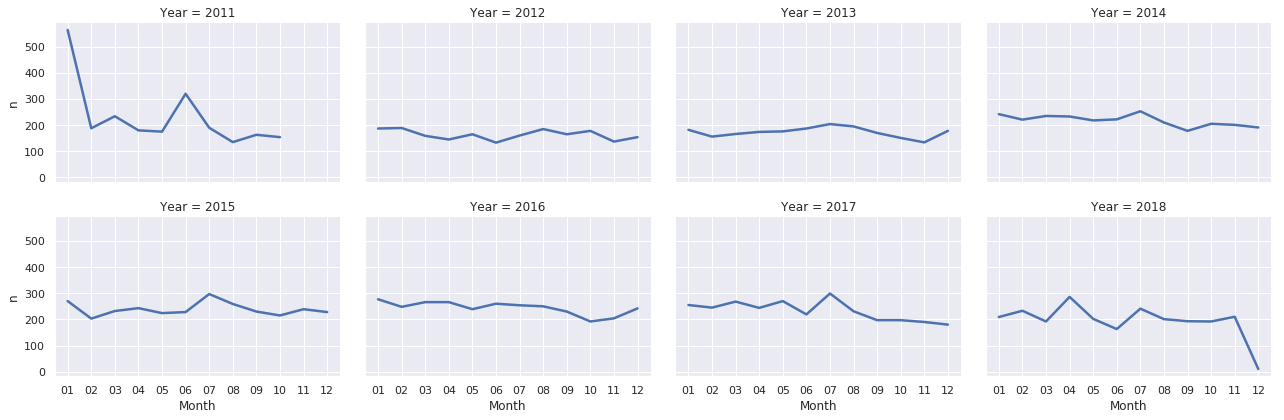

In [11]:
# Fitness
sns.set(style="darkgrid")


x = fitness["UsersF"].loc[:,["Id", "CreationDate"]]
year=x["CreationDate"].str.slice(0,4)

month=x["CreationDate"].str.slice(5,7)
month.head()

x["Year"]=pd.Series(year)
x["Month"]=pd.Series(month)
x = x.groupby(["Year", "Month"]).size().reset_index().loc[6:99].reset_index(drop=True)

x = x.rename(str,columns={0:"n"})

x.to_csv("dane_posrednie/q1/fitness.csv", sep='\t')

plt = sns.relplot(x="Month", y="n",
            col="Year", col_wrap=4,
            height=3,dashes=True, aspect=1.5, linewidth=2.5,
            kind="line", data=x);

plt
plt.savefig("wykresy/q1/fitness.png")

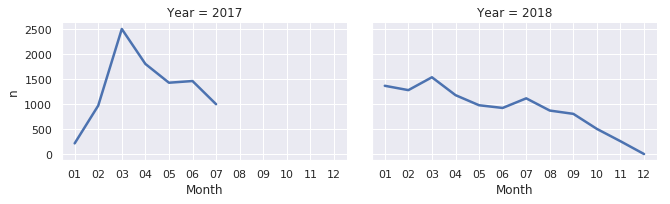

In [18]:
#INTERPERSONAL
x = interpersonal["UsersI"].loc[:,["Id", "CreationDate"]]
year=x["CreationDate"].str.slice(0,4)

month=x["CreationDate"].str.slice(5,7)


x["Year"]=pd.Series(year)
x["Month"]=pd.Series(month)
x = x.groupby(["Year", "Month"]).size().reset_index()

x = x.rename(str,columns={0:"n"})

x.to_csv("dane_posrednie/q1/interpersonal.csv", sep='\t')

plt = sns.relplot(x="Month", y="n",
            col="Year", col_wrap=4,
            height=3,dashes=True, aspect=1.5, linewidth=2.5,
            kind="line", data=x);

plt
plt.savefig("wykresy/q1/interpersonal.png")

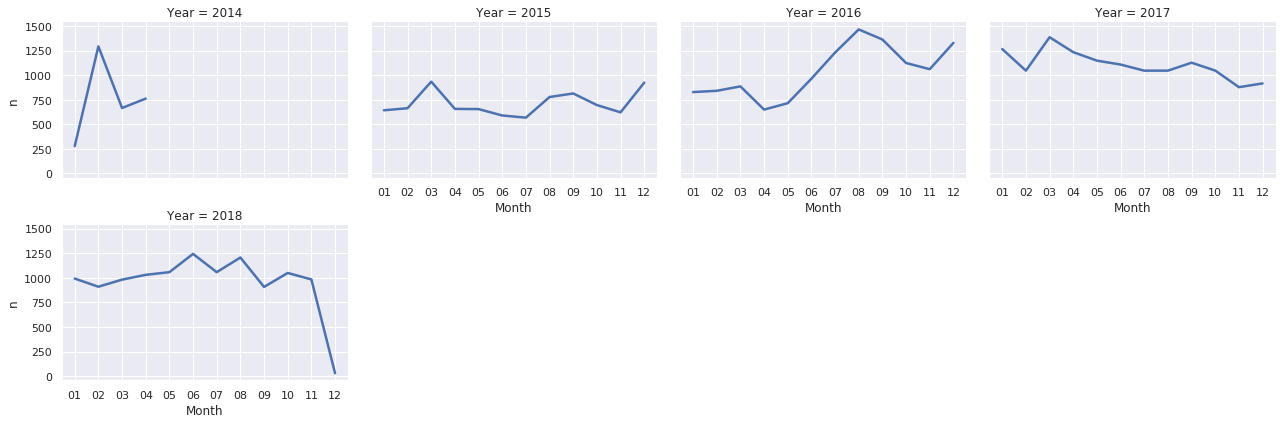

In [25]:
#Worldbuilding

x = worldbuilding["UsersW"].loc[:,["Id", "CreationDate"]]
year=x["CreationDate"].str.slice(0,4)

month=x["CreationDate"].str.slice(5,7)
month.head()

x["Year"]=pd.Series(year)
x["Month"]=pd.Series(month)
x = x.groupby(["Year", "Month"]).size().reset_index()

x = x.rename(str,columns={0:"n"})

x.to_csv("dane_posrednie/q1/worldbuilding.csv", sep='\t')

plt = sns.relplot(x="Month", y="n",
            col="Year", col_wrap=4,
            height=3,dashes=True, aspect=1.5, linewidth=2.5,
            kind="line", data=x);

plt
plt.savefig("wykresy/q1/worldbuilding.png")